In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low,Date
2109,914.5,914.5,914.5,914.5,2024-06-01
2108,949.5,914.5,956.0,903.5,2024-05-31
2107,957.0,950.5,962.0,932.5,2024-05-30
2106,982.5,968.0,983.0,946.5,2024-05-29
2105,995.5,975.5,997.0,969.5,2024-05-28
...,...,...,...,...,...
4,1100.0,1091.5,1103.0,1086.5,2018-01-05
3,1086.5,1102.5,1108.5,1083.5,2018-01-04
2,1095.5,1088.0,1097.0,1084.0,2018-01-03
1,1066.5,1096.0,1099.0,1066.0,2018-01-02


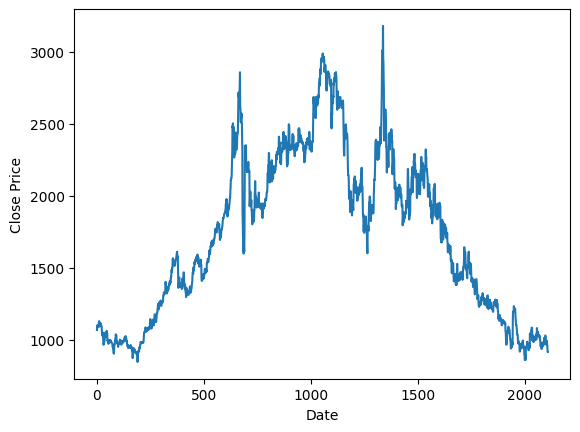

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,914.5
1,914.5
2,950.5
3,968.0
4,975.5


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.02937393],
       [0.02937393],
       [0.04481132],
       ...,
       [0.62585763],
       [0.61663808],
       [0.62542882]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.62521441, 0.62521441, 0.62392796, ..., 0.56946827, 0.56946827,
        0.59498285],
       [0.62521441, 0.62392796, 0.60184391, ..., 0.56946827, 0.59498285,
        0.57654374],
       [0.62392796, 0.60184391, 0.61620926, ..., 0.59498285, 0.57654374,
        0.55596055],
       ...,
       [0.05703259, 0.05660377, 0.05102916, ..., 0.10977702, 0.10956261,
        0.10527444],
       [0.05660377, 0.05102916, 0.06089194, ..., 0.10956261, 0.10527444,
        0.10999142],
       [0.05102916, 0.06089194, 0.07204117, ..., 0.10527444, 0.10999142,
        0.10377358]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1235, 30) (1235,)
(813, 30) (813,)


In [13]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [14]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [15]:
y_pred

array([0.60483117, 0.60505569, 0.59161894, 0.5801576 , 0.56555953,
       0.56379243, 0.56055887, 0.5611765 , 0.57698757, 0.59970729,
       0.61880014, 0.62086791, 0.61634382, 0.61046619, 0.58918058,
       0.58753215, 0.58216332, 0.55801767, 0.54758581, 0.54089734,
       0.53716086, 0.53383332, 0.53353072, 0.52539325, 0.51533342,
       0.50765973, 0.50138289, 0.50470385, 0.49891035, 0.48657734,
       0.48232429, 0.48687432, 0.49036125, 0.49228793, 0.49050097,
       0.4900473 , 0.49565348, 0.49235911, 0.48740688, 0.48442128,
       0.46908695, 0.46352088, 0.47581817, 0.48270614, 0.48381035,
       0.48495252, 0.4829883 , 0.47885145, 0.48386237, 0.48731151,
       0.48779696, 0.4872682 , 0.48346339, 0.48513738, 0.48610146,
       0.49188067, 0.49462944, 0.50515087, 0.50427478, 0.49701161,
       0.50012384, 0.49130119, 0.49190585, 0.49414237, 0.49612655,
       0.49566046, 0.49425205, 0.48735366, 0.49334543, 0.49962587,
       0.50171009, 0.50149811, 0.49524203, 0.50658358, 0.52556

In [16]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.10803557687790172
Testing MSE: 0.0008654689918524531
Testing RMSE: 0.029418854359958568


In [17]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_pred

array([2256.46628591, 2256.98986121, 2225.65536048, 2198.92752789,
       2164.88483292, 2160.76395034, 2153.22328989, 2154.66359459,
       2191.53502118, 2244.51739938, 2289.04193045, 2293.86396258,
       2283.31377963, 2269.60715763, 2219.96911535, 2216.12497003,
       2203.60486146, 2147.2971969 , 2122.97010254, 2107.37260357,
       2098.65913432, 2090.89929197, 2090.19363796, 2071.21705407,
       2047.75753465, 2029.86248196, 2015.22489347, 2022.96938861,
       2009.45892623, 1980.6983485 , 1970.78023274, 1981.39091051,
       1989.52243659, 1994.01544989, 1989.84827301, 1988.79030499,
       2001.86391288, 1994.18144545, 1982.63283458, 1975.67043595,
       1939.91077697, 1926.93068231, 1955.60798209, 1971.67071358,
       1974.24573006, 1976.90928723, 1972.3287208 , 1962.68159163,
       1974.36705602, 1982.41043331, 1983.54251442, 1982.30943595,
       1973.43661424, 1977.34036503, 1979.58859767, 1993.06571373,
       1999.47586312, 2024.01182232, 2021.96878092, 2005.03106

In [18]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.113611506759519
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.11361151]
1 day output 0.1166551811888211
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.103

In [19]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.113611506759519
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.11361151]
1 day output 0.1166551811888211
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.103

In [20]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.113611506759519
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.11361151]
1 day output 0.1166551811888211
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.103

In [21]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

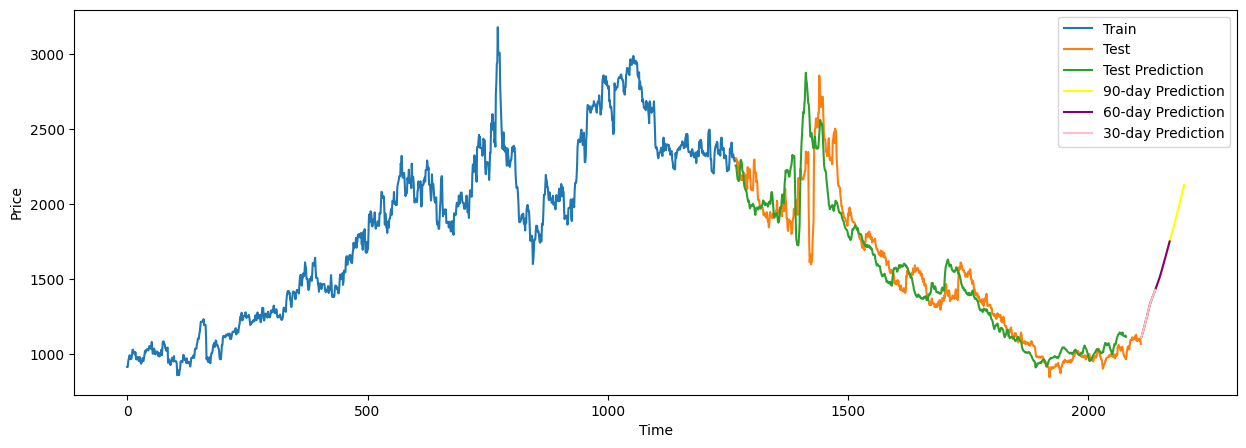

In [22]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()